#  Dataset details:
there are 25 columns: ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others, 4=Divorced)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

Inspiration Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?

Which variables are the strongest predictors of default payment?

# 1.Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

# 2.1.Importing initial dependencies and loading dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,f1_score,precision_score,classification_report,precision_recall_curve
from imblearn.over_sampling import RandomOverSampler,SMOTE,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from sklearn.model_selection import GridSearchCV,cross_val_score
%matplotlib inline

C:\Users\SHIVAM\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('UCI_Credit_Card.csv') 

# 3. Exploring dataset 

In [3]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


## 3.1 Pandas Profiling for EDA

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [5]:
# profile

## 3.2 univariate analysis

#### Marriage

In [6]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:
df['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [8]:
df['MARRIAGE']=df['MARRIAGE'].replace(0,3)

In [9]:
df['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

#### Sex

In [10]:
df['SEX'].unique()

array([2, 1], dtype=int64)

#### Education

In [11]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [12]:
df['EDUCATION'].value_counts(normalize=True)

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

In [13]:
df['EDUCATION']=df['EDUCATION'].replace((6,0),5)

## 3.2.Missing value

In [14]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## 3.3. Checking if data is biased 

defaulter     6636
normal       23364
dtype: int64


([<matplotlib.patches.Wedge at 0x1e2d93b42b0>,
 [Text(-0.8449152390547128, 0.704356613380692, 'normal'),
  Text(0.8449152720280249, -0.7043565738273541, 'defaulters')],
 [Text(-0.46086285766620694, 0.38419451638946833, '77.88'),
  Text(0.46086287565164985, -0.38419449481492035, '22.12')])

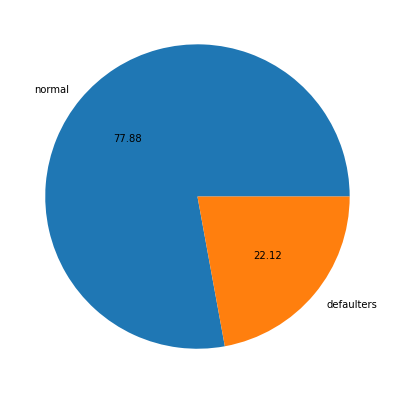

In [15]:
defaulters=df[df['default.payment.next.month']==1].value_counts().sum()
normal=df[df['default.payment.next.month']==0].value_counts().sum()
data={'defaulter':defaulters,
      'normal':normal
    }
df_default_normal=pd.Series(data)
print(df_default_normal)


plt.figure(figsize=(7,7))
labels=['normal','defaulters']
plt.pie(df['default.payment.next.month'].value_counts(),labels=labels,autopct='%.2f')

# 4.data visualisation for further analysis

## 4.1.visual distribution of features

#### 4.1.1. limit_bal distribution

Text(0, 0.5, 'limit_balence')

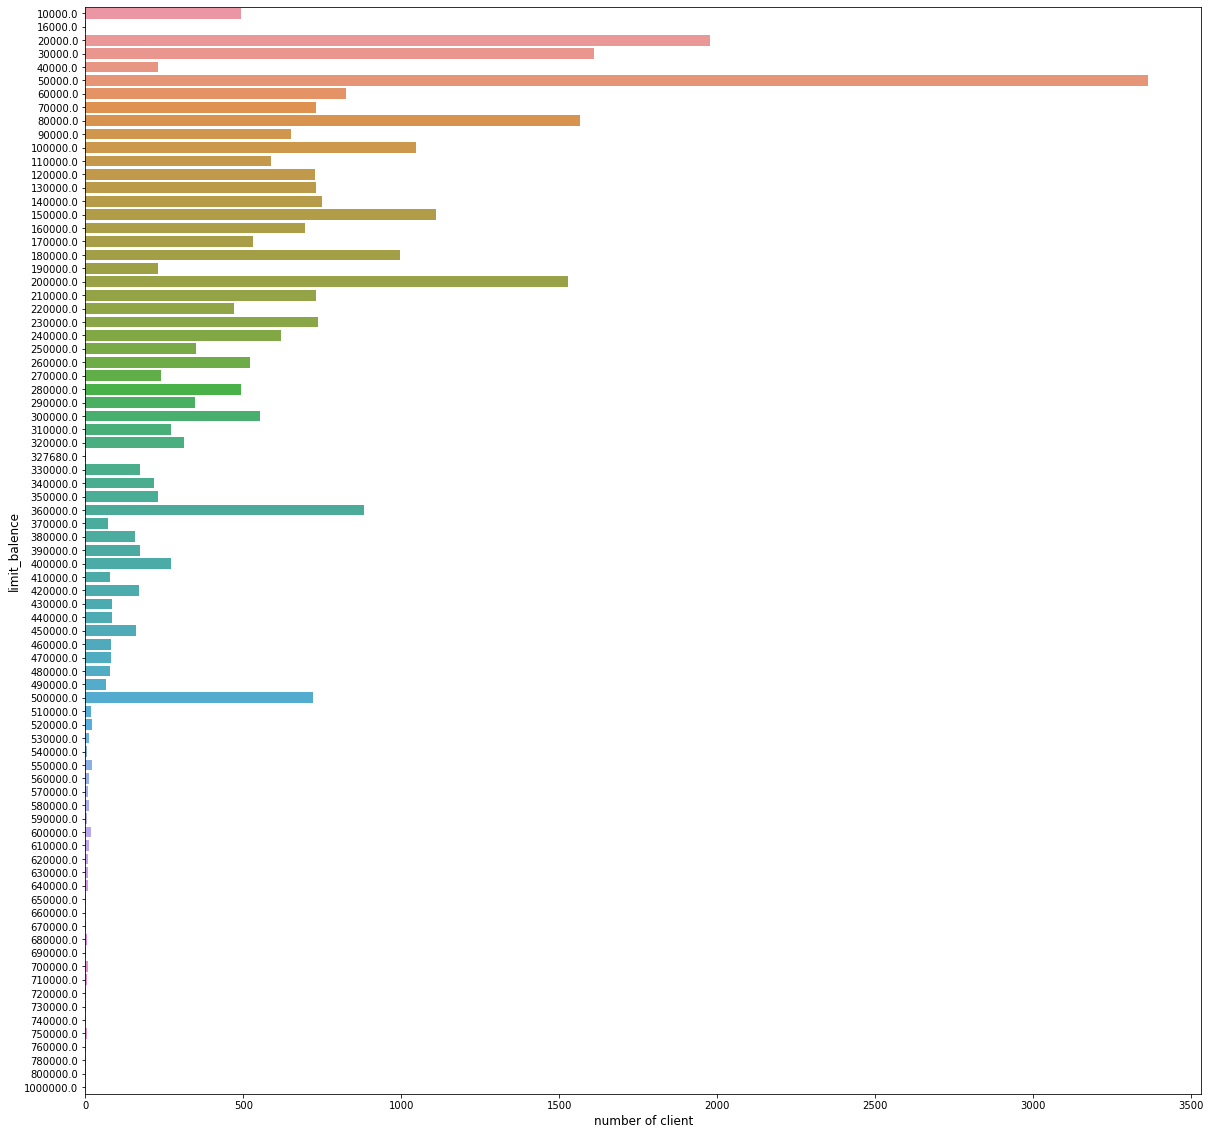

In [16]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,y='LIMIT_BAL')
plt.xlabel("number of client", fontsize= 12)
plt.ylabel("limit_balence", fontsize= 12)

#### 4.1.2. Age distribution

Text(0.5, 0, 'Age')

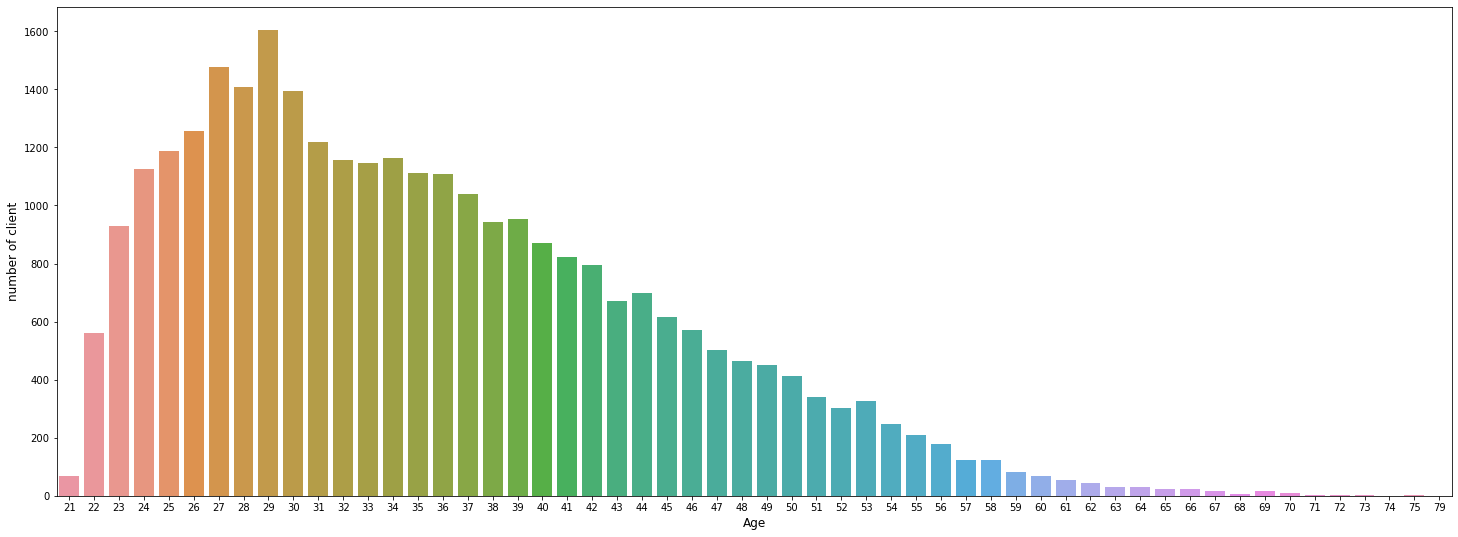

In [17]:
plt.figure(figsize=(25,9))
sns.countplot(data=df,x='AGE')
plt.ylabel("number of client", fontsize= 12)
plt.xlabel("Age", fontsize= 12)

## 4.2. analyzing defaulters w.r.t credit given and demographic factors 

#### 4.2.1. limit_bal and defaulters

Text(0, 0.5, 'limit_balence')

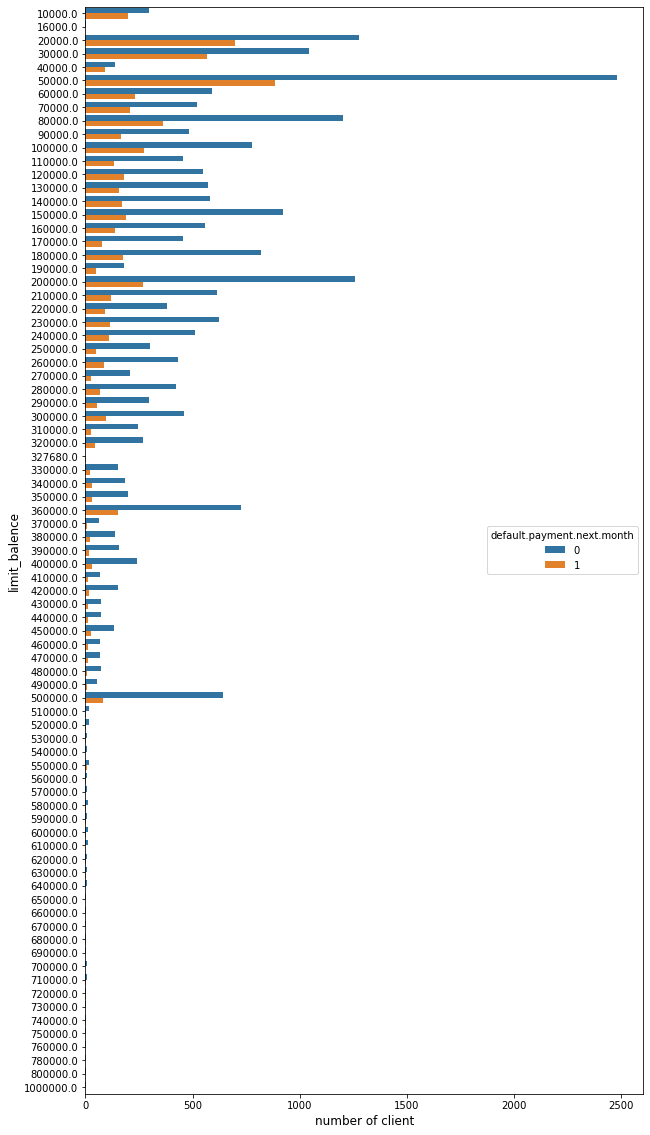

In [18]:
plt.figure(figsize=(10,20))
sns.countplot(y='LIMIT_BAL',hue='default.payment.next.month',data=df)
plt.xlabel("number of client", fontsize= 12)
plt.ylabel("limit_balence", fontsize= 12)

###### conclusion:

1.most of the people who have credit amount 20k and 50k are are likely to be defaulters

2.it is also because most clients get credit of 50k in their credit card

#### 4.2.2. sex and defaulters

Text(0, 0.5, 'number of client')

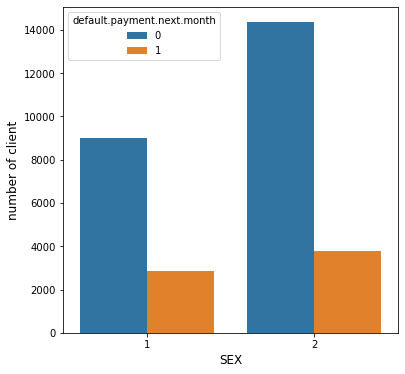

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='SEX',hue='default.payment.next.month',data=df)
plt.xlabel("SEX", fontsize= 12)
plt.ylabel("number of client", fontsize= 12)

##### conclusion:

1.there are more number of female clients

2.more number of females are defaulter comparing to male 

#### 4.2.3. Educational background and defaulter

Text(0, 0.5, 'number of client')

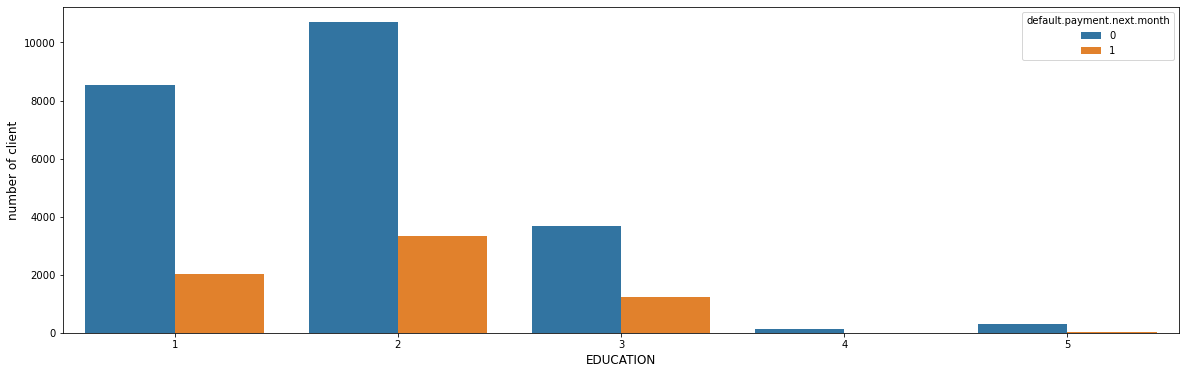

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x='EDUCATION',hue='default.payment.next.month',data=df)
plt.xlabel("EDUCATION", fontsize= 12)
plt.ylabel("number of client", fontsize= 12)

##### conclusion:

1.mostly students who are in university(category2) are defaulters

2.least number of defaulters are from others educational background.

#### 4.2.4. Marriage and defaulters

Text(0, 0.5, 'number of client')

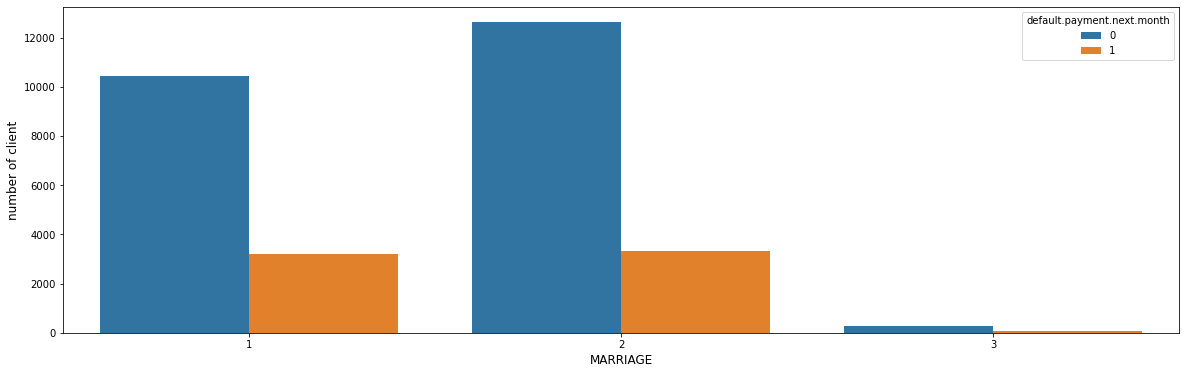

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x='MARRIAGE',hue='default.payment.next.month',data=df)
plt.xlabel("MARRIAGE", fontsize= 12)
plt.ylabel("number of client", fontsize= 12)

##### conclusion:
    1.no significant difference in single and married category(category 1 and 2) in terms of defaulters

#### 4.2.5. Age and defaulter

Text(0, 0.5, 'number of client')

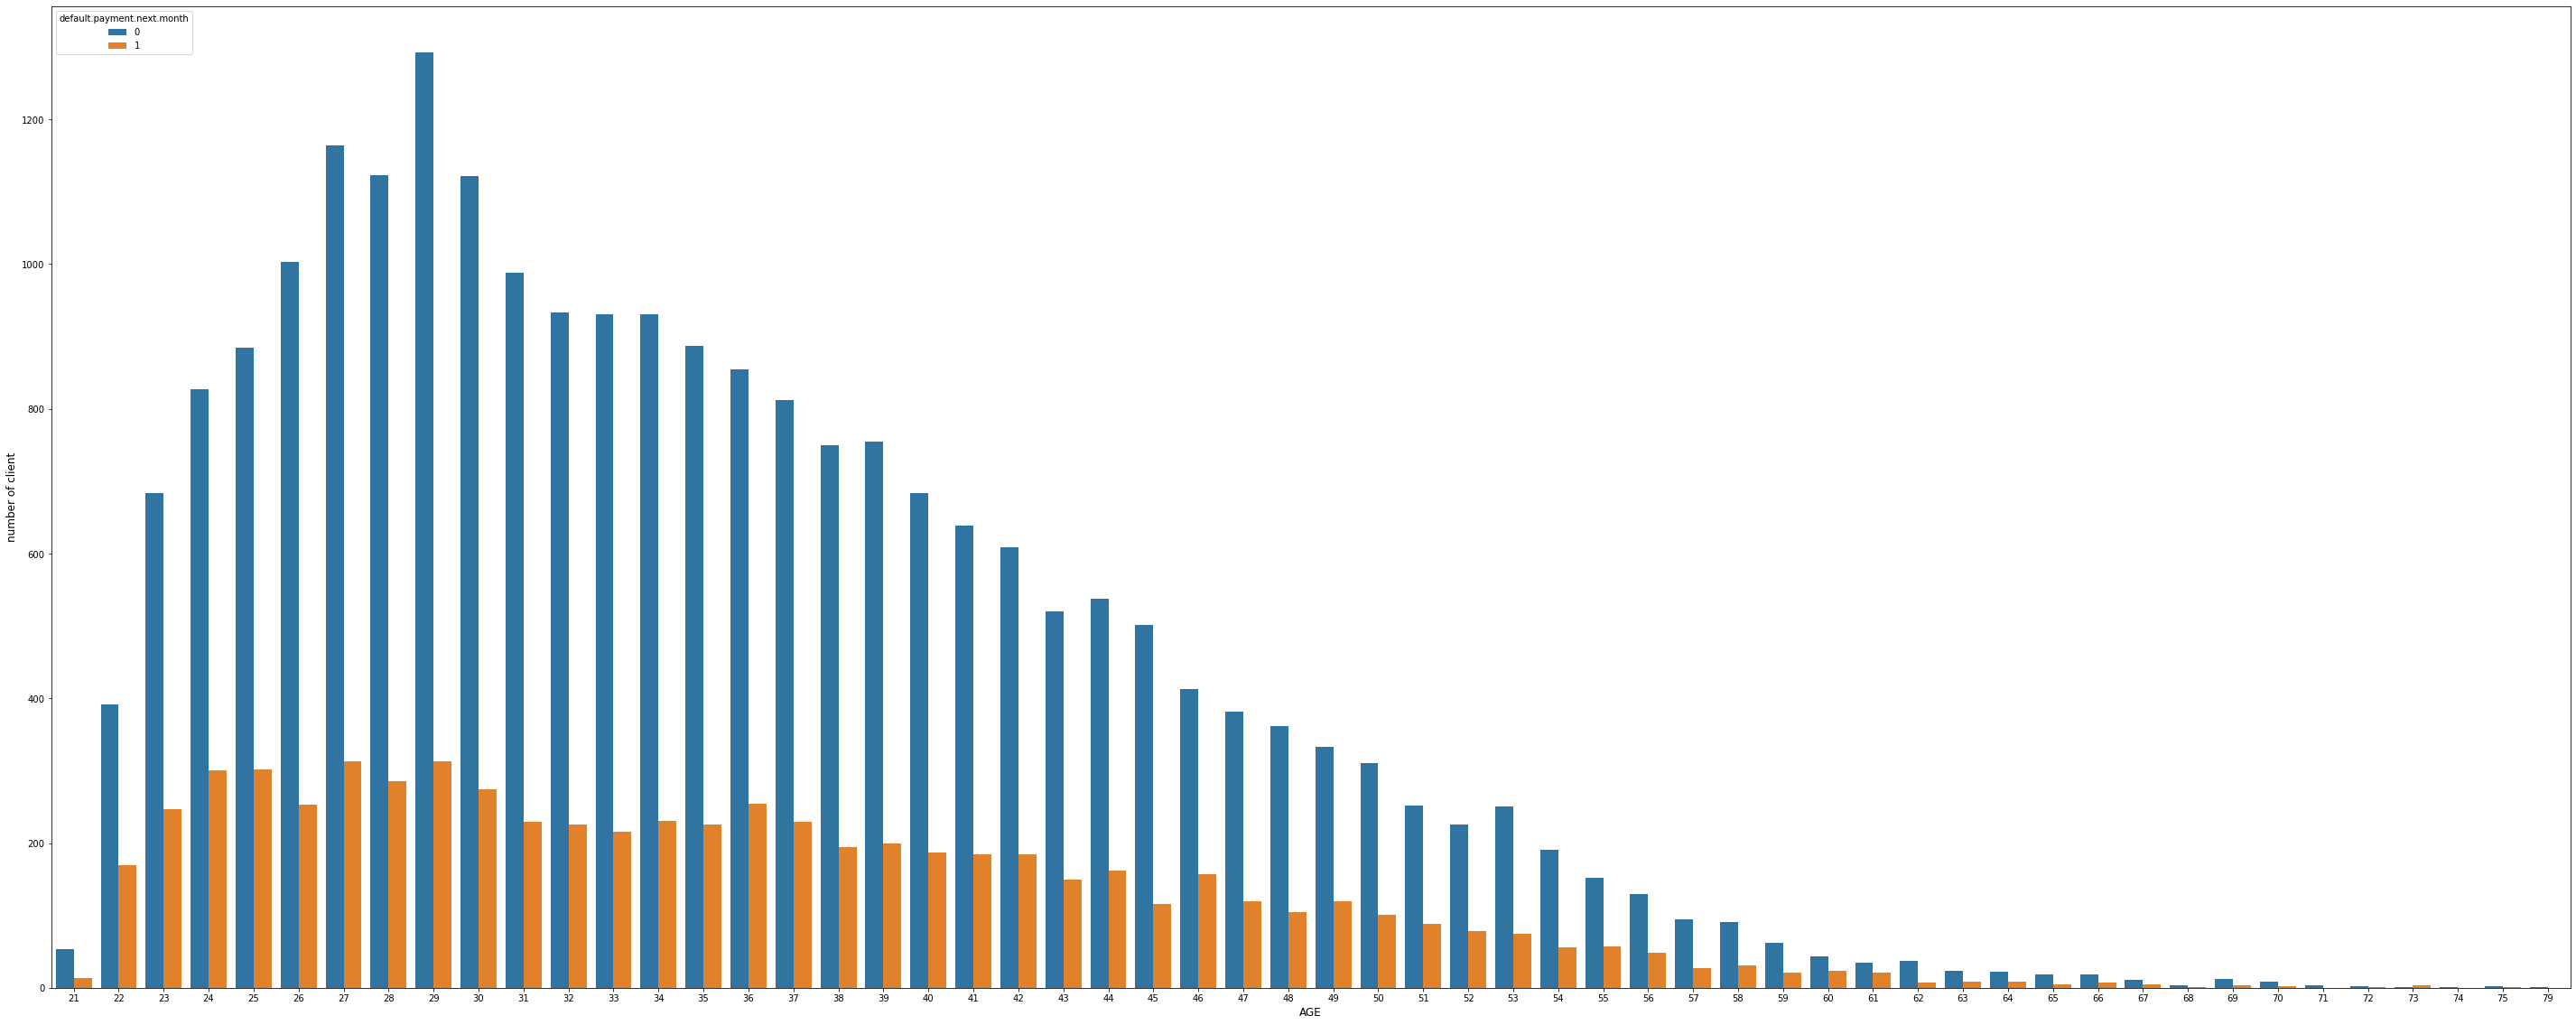

In [22]:
plt.figure(figsize=(50,20))
sns.countplot(hue='default.payment.next.month',x='AGE',data=df)
plt.xlabel("AGE", fontsize= 12)
plt.ylabel("number of client", fontsize= 12)

##### conclusion: 
1.most of of the defaulters are in age group of 20's and 30's

## 4.3.Correlation

<AxesSubplot:>

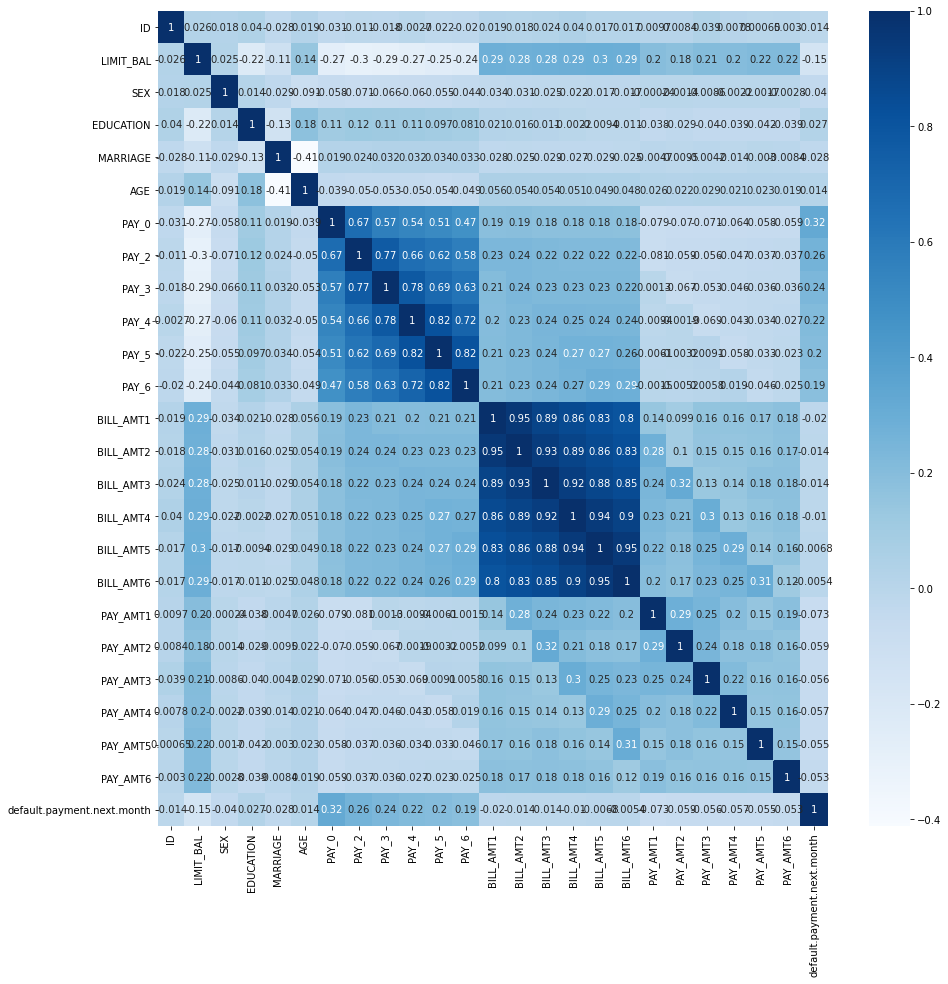

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

##### conclusion for payment,bill and repayment:

 1.repayment and defaulters column show strong correlation

 2.payment and bill show negative or almost zero correlation with defaulters

 3.payment and repayment show negative correlation

 4.age,marriage and sex show almost no correlation with repayment 

 5.repayment w.r.t limit_bal show negative correlation
##### Conclusion for defaulters:

 6.feature like marriage,sex,limit_bal have almost zero or negative correlation with being a defaulter.

# 5.Feature Engineering

#### Repayment

In [24]:
df=df.rename(columns={'PAY_0':'repay_sept','PAY_2':'repay_august','PAY_3':'repay_july','PAY_4':'repay_June','PAY_5':'repay_may','PAY_6':'repay_april'})

In [25]:
repayment=df[['repay_sept','repay_august', 'repay_july', 'repay_June', 'repay_may', 'repay_april']]

In [26]:
repayment.apply(pd.Series.value_counts)

,repay_sept,repay_august,repay_july,repay_June,repay_may,repay_april
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


##### conclusion:
-2: No consumption

-1: Paid in full

0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

###### Bill amount

In [27]:
df=df.rename(columns={'BILL_AMT1':'bill_amt_sept', 'BILL_AMT2':'bill_amt_aug', 'BILL_AMT3':'bill_amt_july', 'BILL_AMT4':'bill_amt_june', 'BILL_AMT5':'bill_amt_may','BILL_AMT6':'bill_amt_april'})

In [28]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'repay_sept',
       'repay_august', 'repay_july', 'repay_June', 'repay_may', 'repay_april',
       'bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 'bill_amt_june',
       'bill_amt_may', 'bill_amt_april', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month'],
      dtype='object')

In [29]:
bill_amount=df[['bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 'bill_amt_june',
       'bill_amt_may', 'bill_amt_april']]

In [30]:
bill_amount

,bill_amt_sept,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_april
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0


####  Pay amount

In [31]:
df=df.rename(columns={'PAY_AMT1':'pay_amt_sept', 'PAY_AMT2':'pay_amt_aug', 'PAY_AMT3':'pay_amt_july', 'PAY_AMT4':'pay_amt_june', 'PAY_AMT5':'pay_amt_may','PAY_AMT6':'pay_amt_april'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'repay_sept',
       'repay_august', 'repay_july', 'repay_June', 'repay_may', 'repay_april',
       'bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 'bill_amt_june',
       'bill_amt_may', 'bill_amt_april', 'pay_amt_sept', 'pay_amt_aug',
       'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
       'default.payment.next.month'],
      dtype='object')

In [32]:
pay_amount=df[['pay_amt_sept', 'pay_amt_aug','pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april']]

In [33]:
pay_amount

,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april
0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...
29995,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


## 5.1. New Features

##### Total Bill

In [34]:
df['total_bill']=df[ 'bill_amt_sept']+df['bill_amt_aug']+df ['bill_amt_july']+df['bill_amt_june']+df['bill_amt_may']+df['bill_amt_april']

##### Total Pay Amount

In [35]:
df['total_pay_amount']=df[ 'pay_amt_sept']+df['pay_amt_aug']+df ['pay_amt_july']+df['pay_amt_june']+df['pay_amt_may']+df['pay_amt_april']

##### Due Amount

In [36]:
df['due_amount']=df['total_bill']-df['total_pay_amount']

##### Checking correlation of new features with other features

<AxesSubplot:>

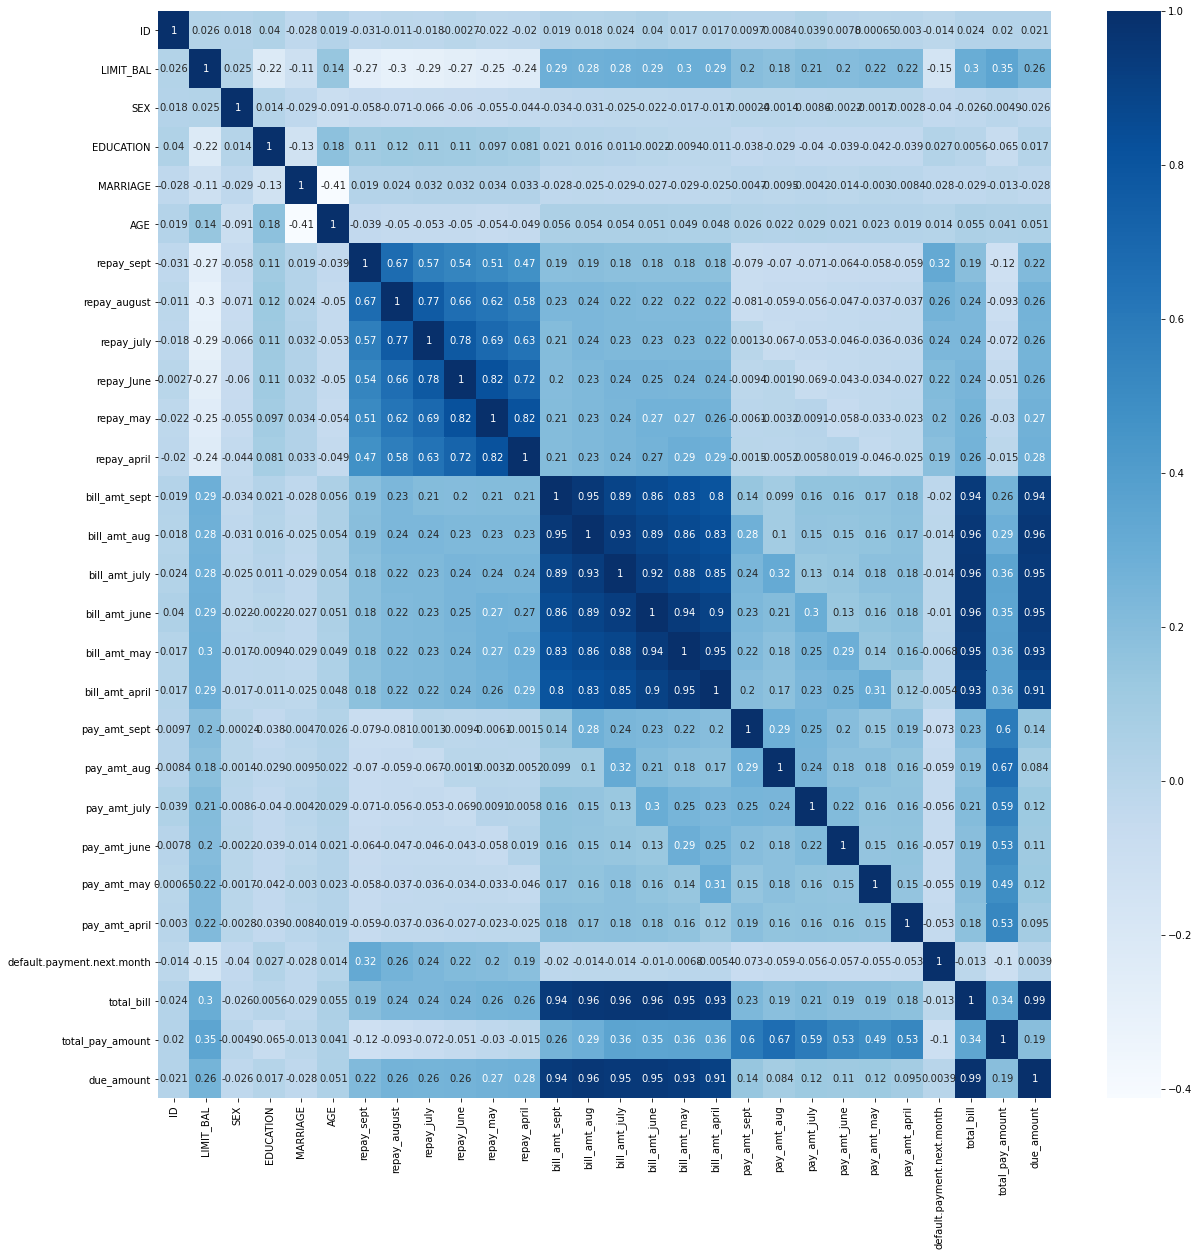

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

##### Conclusion:
1.due_amount and total_bill are strongly correlated.

2.bill_amt for all months are strongly correlated with due_amount and total_bill.

##### new features need not to to be considered because of multicolleniarity issues:
total_pay_amount,total_bill and due_amt for all months 




In [38]:
#seperating into dependent and independent
x = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

## 5.1.One hot encoding

####  for education and sex

In [39]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [40]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [41]:
# df.replace({'EDUCATION':{1:'graduate',2:'university',3:'high_school',4:'others'},'SEX':{1:'Male',2:'Female'}},inplace=True)

In [42]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,repay_sept,repay_august,repay_july,repay_June,...,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default.payment.next.month,total_bill,total_pay_amount,due_amount
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,7015.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,12077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,90635.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,222946.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,50290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,725349.0,42550.0,682799.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,21182.0,14490.0,6692.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,70496.0,31300.0,39196.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,266611.0,147181.0,119430.0


In [43]:
x=pd.get_dummies(x,columns=['EDUCATION'],drop_first=True)
x=pd.get_dummies(x,columns=['SEX'],drop_first=True)

In [44]:
x

,ID,LIMIT_BAL,MARRIAGE,AGE,repay_sept,repay_august,repay_july,repay_June,repay_may,repay_april,...,pay_amt_may,pay_amt_april,total_bill,total_pay_amount,due_amount,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,SEX_2
0,1,20000.0,1,24,2,2,-1,-1,-2,-2,...,0.0,0.0,7704.0,689.0,7015.0,1,0,0,0,1
1,2,120000.0,2,26,-1,2,0,0,0,2,...,0.0,2000.0,17077.0,5000.0,12077.0,1,0,0,0,1
2,3,90000.0,2,34,0,0,0,0,0,0,...,1000.0,5000.0,101653.0,11018.0,90635.0,1,0,0,0,1
3,4,50000.0,1,37,0,0,0,0,0,0,...,1069.0,1000.0,231334.0,8388.0,222946.0,1,0,0,0,1
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,689.0,679.0,109339.0,59049.0,50290.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,39,0,0,0,0,0,0,...,5000.0,1000.0,725349.0,42550.0,682799.0,0,1,0,0,0
29996,29997,150000.0,2,43,-1,-1,-1,-1,0,0,...,0.0,0.0,21182.0,14490.0,6692.0,0,1,0,0,0
29997,29998,30000.0,2,37,4,3,2,-1,0,0,...,2000.0,3100.0,70496.0,31300.0,39196.0,1,0,0,0,0
29998,29999,80000.0,1,41,1,-1,0,0,0,-1,...,52964.0,1804.0,266611.0,147181.0,119430.0,0,1,0,0,0


In [45]:
df.shape

(30000, 28)

#### for repay

In [46]:
# x= pd.get_dummies(x, columns = [ 'repay_sept','repay_august', 'repay_july', 'repay_June', 'repay_may', 'repay_april'])
# repay= pd.get_dummies(x, columns = [ 'repay_sept','repay_august', 'repay_july', 'repay_June', 'repay_may', 'repay_april'])

In [47]:
x.shape

(30000, 30)

In [48]:
x.columns

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'repay_sept', 'repay_august',
       'repay_july', 'repay_June', 'repay_may', 'repay_april', 'bill_amt_sept',
       'bill_amt_aug', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may',
       'bill_amt_april', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july',
       'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'total_bill',
       'total_pay_amount', 'due_amount', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'SEX_2'],
      dtype='object')

In [49]:
# df = df.drop(columns=['due_amount','total_bill','total_pay_amount'])
# df

In [50]:
x = x.drop(columns=['due_amount','total_pay_amount','total_bill','ID'])
# y = df['default.payment.next.month']

In [51]:
#we wouldnt randomly drop columns from repayment
#we would check the value counts for each value in repayment columns for each month

In [52]:
df.shape

(30000, 28)

In [53]:
# df.repay_april.value_counts(ascending=False)
# df1.drop(columns=['repay_april_5', 'repay_april_6', 'repay_april_7','repay_april_8']])

In [54]:
# df.repay_may.value_counts(ascending=False)
# df1.drop(columns=, 'repay_may_5', 'repay_may_6', 'repay_may_7','repay_may_8']])

In [55]:
# df.repay_June.value_counts(ascending=False)
# df1.drop(columns= 'repay_June_1', 'repay_June_8','repay_June_6', 'repay_June_5', 'repay_June_7',)

In [56]:
# df.repay_july.value_counts(ascending=False)
# df1.drop(columns= 'repay_july_8','repay_july_1', 'repay_july_5', 'repay_july_6', 'repay_july_7',)

In [57]:
# df.repay_august.value_counts(ascending=False)
# df1.drop(columns= 'repay_august_5','repay_august_6', 'repay_august_7', 'repay_august_8', 'repay_august_1)

In [58]:
# df.repay_sept.value_counts(ascending=False)
# df1.drop(columns= 'repay_sept_4', 'repay_sept_5', 'repay_sept_7','repay_sept_8','repay_sept_6')

In [59]:
x.columns

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'repay_sept', 'repay_august',
       'repay_july', 'repay_June', 'repay_may', 'repay_april', 'bill_amt_sept',
       'bill_amt_aug', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may',
       'bill_amt_april', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july',
       'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'SEX_2'],
      dtype='object')

In [60]:
x.shape

(30000, 26)

In [61]:
# x=x.drop(columns=['due_amount','total_bill','total_pay_amount','repay_sept_4', 'repay_sept_5', 'repay_sept_7','repay_sept_6','repay_sept_8', 'repay_august_5','repay_august_6', 'repay_august_7', 'repay_august_8', 'repay_august_1','repay_july_8','repay_july_1','repay_july_5', 'repay_july_6', 'repay_july_7','repay_June_1', 'repay_June_8','repay_June_6', 'repay_June_5', 'repay_June_7', 'repay_may_5', 'repay_may_6', 'repay_may_7','repay_may_8', 'repay_april_6', 'repay_april_7','repay_april_8','repay_april_5'],axis=0)

In [62]:
x

,LIMIT_BAL,MARRIAGE,AGE,repay_sept,repay_august,repay_july,repay_June,repay_may,repay_april,bill_amt_sept,...,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,SEX_2
0,20000.0,1,24,2,2,-1,-1,-2,-2,3913.0,...,689.0,0.0,0.0,0.0,0.0,1,0,0,0,1
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,0,1
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,1500.0,1000.0,1000.0,1000.0,5000.0,1,0,0,0,1
3,50000.0,1,37,0,0,0,0,0,0,46990.0,...,2019.0,1200.0,1100.0,1069.0,1000.0,1,0,0,0,1
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,36681.0,10000.0,9000.0,689.0,679.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,39,0,0,0,0,0,0,188948.0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,1,0,0,0
29996,150000.0,2,43,-1,-1,-1,-1,0,0,1683.0,...,3526.0,8998.0,129.0,0.0,0.0,0,1,0,0,0
29997,30000.0,2,37,4,3,2,-1,0,0,3565.0,...,0.0,22000.0,4200.0,2000.0,3100.0,1,0,0,0,0
29998,80000.0,1,41,1,-1,0,0,0,-1,-1645.0,...,3409.0,1178.0,1926.0,52964.0,1804.0,0,1,0,0,0


In [63]:
x.shape

(30000, 26)

In [64]:
x.columns

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'repay_sept', 'repay_august',
       'repay_july', 'repay_June', 'repay_may', 'repay_april', 'bill_amt_sept',
       'bill_amt_aug', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may',
       'bill_amt_april', 'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july',
       'pay_amt_june', 'pay_amt_may', 'pay_amt_april', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'SEX_2'],
      dtype='object')

In [65]:
x

,LIMIT_BAL,MARRIAGE,AGE,repay_sept,repay_august,repay_july,repay_June,repay_may,repay_april,bill_amt_sept,...,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,SEX_2
0,20000.0,1,24,2,2,-1,-1,-2,-2,3913.0,...,689.0,0.0,0.0,0.0,0.0,1,0,0,0,1
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,0,1
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,1500.0,1000.0,1000.0,1000.0,5000.0,1,0,0,0,1
3,50000.0,1,37,0,0,0,0,0,0,46990.0,...,2019.0,1200.0,1100.0,1069.0,1000.0,1,0,0,0,1
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,36681.0,10000.0,9000.0,689.0,679.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,39,0,0,0,0,0,0,188948.0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,1,0,0,0
29996,150000.0,2,43,-1,-1,-1,-1,0,0,1683.0,...,3526.0,8998.0,129.0,0.0,0.0,0,1,0,0,0
29997,30000.0,2,37,4,3,2,-1,0,0,3565.0,...,0.0,22000.0,4200.0,2000.0,3100.0,1,0,0,0,0
29998,80000.0,1,41,1,-1,0,0,0,-1,-1645.0,...,3409.0,1178.0,1926.0,52964.0,1804.0,0,1,0,0,0


In [66]:
#split the data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.27, random_state=5445)

In [67]:
x_train.shape

(21899, 26)

In [68]:
res=RandomOverSampler()
sm=BorderlineSMOTE()

In [69]:
x_train_res,y_train_res=res.fit_resample(x_train,y_train)

In [70]:
x_train_res.shape

(34190, 26)

In [71]:
#scaling
sc=StandardScaler()
x_train_res_sc=sc.fit_transform(x_train_res)
x_test_sc=sc.transform(x_test)

# Random forest

In [72]:
rf=RandomForestClassifier()

In [73]:
x_train_res.head()

,LIMIT_BAL,MARRIAGE,AGE,repay_sept,repay_august,repay_july,repay_June,repay_may,repay_april,bill_amt_sept,...,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,SEX_2
0,100000.0,1,39,-1,-1,-1,-1,-1,-1,29449.0,...,34181.0,12592.0,71340.0,32453.0,37035.0,0,0,0,0,1
1,50000.0,1,47,1,-1,-1,-1,-2,-2,0.0,...,226.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,50000.0,2,41,0,0,0,0,-2,-2,43885.0,...,2025.0,0.0,0.0,0.0,0.0,1,0,0,0,1
3,500000.0,2,30,0,0,0,0,0,0,135634.0,...,6000.0,5355.0,3500.0,2513.0,5000.0,1,0,0,0,0
4,130000.0,1,27,0,0,-1,0,0,0,53119.0,...,22511.0,600.0,1005.0,1004.0,1006.0,1,0,0,0,0


In [74]:
x_train_res.iloc[2:,10:]

,bill_amt_aug,bill_amt_july,bill_amt_june,bill_amt_may,bill_amt_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,SEX_2
2,45408.0,36025.0,0.0,0.0,0.0,2408.0,2025.0,0.0,0.0,0.0,0.0,1,0,0,0,1
3,135796.0,133712.0,136069.0,67837.0,69514.0,5034.0,6000.0,5355.0,3500.0,2513.0,5000.0,1,0,0,0,0
4,48994.0,17285.0,12448.0,12855.0,11795.0,3106.0,22511.0,600.0,1005.0,1004.0,1006.0,1,0,0,0,0
5,7239.0,30418.0,31370.0,13496.0,23943.0,7239.0,30418.0,31370.0,13496.0,12000.0,22593.0,0,1,0,0,1
6,24285.0,26143.0,26929.0,19610.0,20591.0,5896.0,3002.0,2130.0,2.0,3004.0,8013.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34185,1081.0,6144.0,14977.0,9473.0,8002.0,1085.0,6146.0,9473.0,0.0,5.0,1386.0,0,0,0,0,1
34186,91466.0,93182.0,90851.0,96576.0,98452.0,5000.0,4000.0,0.0,7200.0,3500.0,3600.0,1,0,0,0,0
34187,36123.0,26113.0,22661.0,20351.0,16639.0,2904.0,1500.0,1000.0,2000.0,1000.0,2000.0,0,0,0,0,0
34188,31634.0,32317.0,32787.0,33416.0,34116.0,1800.0,1500.0,1300.0,1300.0,1400.0,1500.0,1,0,0,0,1


In [75]:
rf.fit(x_train_res,y_train_res)

RandomForestClassifier()

In [76]:
y_pred_rf=rf.predict(x_test)

In [77]:
recall_rf=recall_score(y_pred_rf,y_test)

In [78]:
confusion_matrix(y_pred_rf,y_test)

array([[5790, 1058],
       [ 479,  774]], dtype=int64)

In [79]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      6848
           1       0.42      0.62      0.50      1253

    accuracy                           0.81      8101
   macro avg       0.67      0.73      0.69      8101
weighted avg       0.85      0.81      0.82      8101



In [80]:
f1_rf=f1_score(y_pred_rf,y_test)

In [81]:
accuracy_rf=accuracy_score(y_pred_rf,y_test)

#### roc auc curve

In [82]:
y_pred_proba_rf = rf.predict_proba(x_test)[::,1]

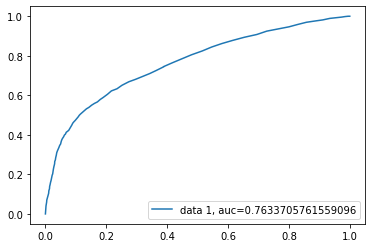

In [83]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Naive bias

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
nb=GaussianNB()

In [86]:
nb.fit(x_train_res_sc,y_train_res)

GaussianNB()

In [87]:
y_pred_nb=nb.predict(x_test_sc)

In [88]:
recall_nb=recall_score(y_pred_nb,y_test)

In [89]:
confusion_matrix(y_pred_nb,y_test)

array([[1370,  155],
       [4899, 1677]], dtype=int64)

In [90]:
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.22      0.90      0.35      1525
           1       0.92      0.26      0.40      6576

    accuracy                           0.38      8101
   macro avg       0.57      0.58      0.38      8101
weighted avg       0.78      0.38      0.39      8101



In [91]:
f1_nb=f1_score(y_pred_nb,y_test)

In [92]:
accuracy_nb=accuracy_score(y_pred_nb,y_test)

In [93]:
y_pred_proba_nb = nb.predict_proba(x_test_sc)[::,1]

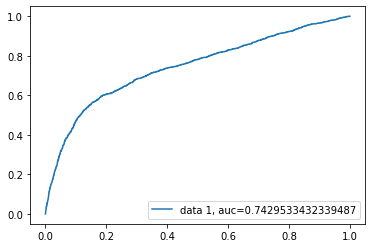

In [94]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_nb)
auc = roc_auc_score(y_test, y_pred_proba_nb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# svc

In [95]:
svc=SVC(probability=True)

In [96]:
svc.fit(x_train_res_sc,y_train_res)

SVC(probability=True)

In [97]:
y_pred_svc=svc.predict(x_test_sc)

In [98]:
recall_svc=recall_score(y_pred_svc,y_test)

In [99]:
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6115
           1       0.58      0.53      0.55      1986

    accuracy                           0.79      8101
   macro avg       0.71      0.70      0.71      8101
weighted avg       0.78      0.79      0.79      8101



In [100]:
accuracy_svc=accuracy_score(y_pred_svc,y_test)

In [101]:
f1_svc=f1_score(y_pred_svc,y_test)

In [102]:
y_pred_proba_svc = svc.predict_proba(x_test_sc)[::,1]

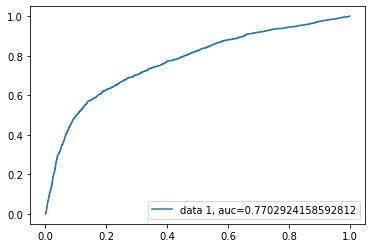

In [103]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_svc)
auc = roc_auc_score(y_test, y_pred_proba_svc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#  Adaboost classifier

In [104]:
ada=AdaBoostClassifier()

In [105]:
ada.fit(x_train_res,y_train_res)

AdaBoostClassifier()

In [106]:
y_pred_ada=ada.predict(x_test)

In [107]:
recall_ada=recall_score(y_pred_ada,y_test)

In [108]:
confusion_matrix(y_pred_ada,y_test)

array([[5090,  725],
       [1179, 1107]], dtype=int64)

In [109]:
print(classification_report(y_pred_ada,y_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      5815
           1       0.60      0.48      0.54      2286

    accuracy                           0.76      8101
   macro avg       0.71      0.68      0.69      8101
weighted avg       0.75      0.76      0.76      8101



In [110]:
accuracy_ada=accuracy_score(y_pred_ada,y_test)

In [111]:
f1_ada=f1_score(y_pred_ada,y_test)

In [112]:
y_pred_proba_ada = ada.predict_proba(x_test)[::,1]

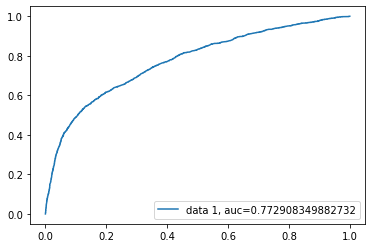

In [113]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_ada)
auc = roc_auc_score(y_test, y_pred_proba_ada)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic regression

In [114]:
lr=LogisticRegression()

In [115]:
lr.fit(x_train_res_sc,y_train_res)

LogisticRegression()

In [116]:
y_pred_lr=lr.predict(x_test_sc)

In [117]:
recall_lr=recall_score(y_pred_lr,y_test)

In [118]:
confusion_matrix(y_pred_lr,y_test)

array([[4483,  641],
       [1786, 1191]], dtype=int64)

In [119]:
f1_lr=f1_score(y_pred_lr,y_test)

In [120]:
accuracy_lr=accuracy_score(y_pred_lr,y_test)

In [121]:
y_pred_proba_lr = lr.predict_proba(x_test_sc)[::,1]

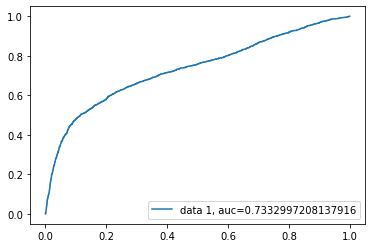

In [122]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_lr)
auc = roc_auc_score(y_test, y_pred_proba_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# xgb

In [123]:
xgb=XGBClassifier()

In [124]:
xgb.fit(x_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [125]:
y_pred_xgb=xgb.predict(x_test)

In [126]:
recall_xgb=recall_score(y_pred_xgb,y_test)

In [127]:
accuracy_xgb=accuracy_score(y_pred_xgb,y_test)

In [128]:
f1_xgb=f1_score(y_pred_xgb,y_test)

In [129]:
y_pred_proba_xgb = xgb.predict_proba(x_test)[::,1]

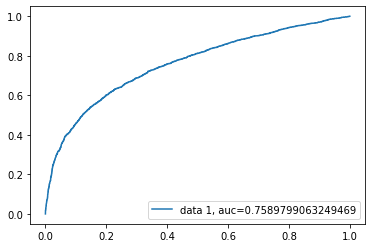

In [130]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_xgb)
auc = roc_auc_score(y_test, y_pred_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# result

In [131]:
#create a table of all models all score for comparison 
classifiers = ['Logistic Regression', 'SVC', 'Random Forest Classifier', 'Xgboost Classifier','Naive bias','Adaboost']
# train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [accuracy_lr, accuracy_svc, accuracy_rf, accuracy_xgb,accuracy_nb,accuracy_ada]
# precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [recall_lr, recall_svc, recall_rf, recall_xgb,recall_nb,recall_ada]
f1_score = [f1_lr, f1_svc, f1_rf, f1_xgb,f1_nb,f1_ada]

In [132]:
pd.DataFrame({'Classifier':classifiers, 'Test Accuracy': test_accuracy,  'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Test Accuracy,Recall Score,F1 Score
0,Logistic Regression,0.700407,0.400067,0.495321
1,SVC,0.789409,0.531722,0.553169
2,Random Forest Classifier,0.810270,0.617717,0.501783
3,Xgboost Classifier,0.771139,0.494701,0.525589
4,Naive bias,0.376126,0.255018,0.398906
5,Adaboost,0.764967,0.484252,0.537640


In [133]:
classifiers_proba = [ 
                      (lr, y_pred_proba_lr), 
                      (rf, y_pred_proba_rf), 
                      (xgb, y_pred_proba_xgb),
                      (svc,y_pred_proba_svc),
                      (nb,y_pred_proba_nb),
                      (ada,y_pred_proba_ada)
                    ]
# (LogisticRegression, y_preds_proba_lr), 
#                       (Random Forest Classifier, y_preds_proba_rf), 
#                       (Xgboost Classifier, y_preds_proba_xgb),
#                       (SVC,y_pred_proba_svc),
#                       (Naive bias,y_pred_proba_nb),
#                       (Adaboost,y_pred_proba_ada)
#                     ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [134]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0001595150741745095, 0.00015...","[0.0, 0.0005458515283842794, 0.001091703056768...",0.733300
RandomForestClassifier,"[0.0, 0.0001595150741745095, 0.000159515074174...","[0.0, 0.003820960698689956, 0.0043668122270742...",0.763371
XGBClassifier,"[0.0, 0.0, 0.0, 0.0001595150741745095, 0.00015...","[0.0, 0.0005458515283842794, 0.002183406113537...",0.758980
SVC,"[0.0, 0.0, 0.0001595150741745095, 0.0001595150...","[0.0, 0.0005458515283842794, 0.000545851528384...",0.770292
GaussianNB,"[0.0, 0.0011166055192215665, 0.001276120593396...","[0.0, 0.015283842794759825, 0.0152838427947598...",0.742953
AdaBoostClassifier,"[0.0, 0.0001595150741745095, 0.000159515074174...","[0.0, 0.0005458515283842794, 0.001637554585152...",0.772908


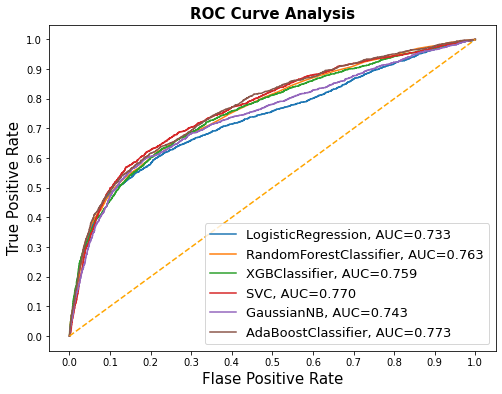

In [135]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [136]:
# # Compute precision, recall and threshold of Random Forest

# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_ada)

# recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
# precision_80 = precisions[np.argmin(recalls >= 0.80)]
# threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

# thresholds = np.append(thresholds, 1)

# recalls_80, precision_80, threshold_80_recall


In [137]:
# # Plot recommended recall = 0.8

# fig, ax = plt.subplots(figsize=(10,5))

# ax.plot(thresholds, recalls, label='Recalls')
# ax.plot(thresholds, precisions, label='Precisions')

# ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
# ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
# ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
# ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
# ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

# ax.set_xlabel('Threshold')
# ax.set_ylabel('Precisons / Recalls')
# ax.legend(loc='center right',fontsize=16)
# plt.title('Model Recommendation(Recalls = 0.8)')
# plt.savefig('recommended_recall')
# plt.show()

# Random forest serelization

In [138]:
import pickle

In [139]:
filename='ccdp_model_rf.pkl' 
pickle.dump(rf,open(filename,'wb'))